In [223]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.signal import find_peaks
from scipy.optimize import minimize

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [232]:
from integrals import *
from known_formulas import *
from plotting_routine import *

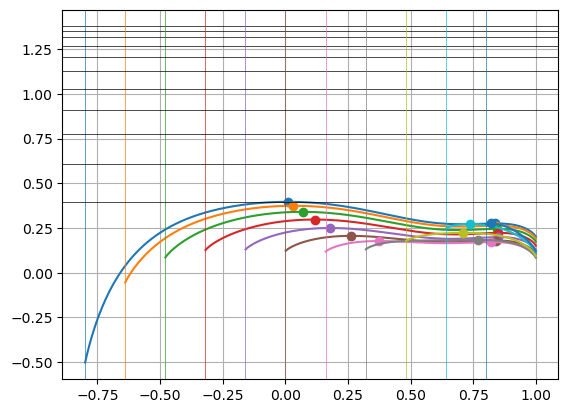

In [234]:
p = 5
e = - 0.7
ms = np.linspace(0.1, 0.9, 11)

for i, m in enumerate(ms):
    qs = np.linspace(2*m-1+0.001, 0.999, 1_000)
    sms = np.array([second_moment_bound(m, q, e, p) for q in qs])
    plt.axhline(2*first_moment_h(m), color="black", linewidth=0.5)
    peaks, _ = find_peaks(sms)
    plt.plot(
        qs[peaks],
        sms[peaks],
        "o",
        color=f"C{i}",
    )
    plt.plot(qs, sms, color=f"C{i}", label=f"m={m:.2f}")

    plt.axvline(2*m-1, color=f"C{i}", linewidth=0.5)
plt.grid()
#plt.xlim(0., 1)
#plt.ylim(-0.5, 0)

In [157]:
p=5
n_points_m = 2_500
n_points_T = 7
n_points_more_T = 3

T_kauz, T_dyn = get_Tk_Td(p)

Teqs = np.hstack(
    (
        np.linspace(T_kauz, T_dyn, n_points_T),
        T_dyn + (T_dyn - T_kauz) / (n_points_T) * np.arange(1, n_points_more_T + 1),
    )
)
es = -1 / (2 * Teqs)
ms = np.linspace(0.0, 0.999, n_points_m)

qs = np.empty((len(es), len(ms)))
tol=1e-5
for j,e in tqdm(enumerate(es), total=len(es)):
    for i,m in enumerate(ms):
        bnds = [(2*m-1+tol, 1-tol)]
        max1 = minimize(lambda q: -second_moment_bound(m, q, e, p), x0 = 1-tol,method='SLSQP', bounds=bnds,tol=tol*1e-5)
        max2 = minimize(lambda q: -second_moment_bound(m, q, e, p), x0 = max(tol,2*m-1+tol),method='SLSQP', bounds=bnds,tol=tol*1e-5)
        if max1.fun < max2.fun:
            qs[j][i] = max1.x[0]
        else:
            qs[j][i] = max2.x[0]

  0%|          | 0/10 [00:00<?, ?it/s]

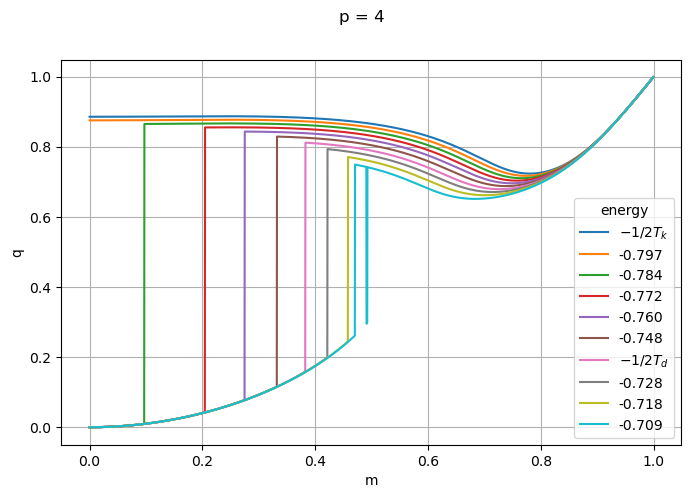

In [158]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"p = {p}")

for i, e in enumerate(es):
    legend_name = legend_name_Tk_Td(e, T_kauz, T_dyn)
    ax.plot(ms, qs[i], label=legend_name)
ax.legend(title="energy")
ax.set_xlabel("m")
ax.set_ylabel("q")
ax.grid()
fig.savefig(f"./imgs/q_2nd_moment_p{p}.png", dpi=360)

### 1st vs 2nd Ratio

In [175]:
second_moment_bound(0.04,0.9998,-0.83,10)

0.0037789473854401567

In [226]:
p=5
n_points_m = 1_000
n_points_T = 7
n_points_more_T = 3

T_kauz, T_dyn = get_Tk_Td(p)

Teqs = np.hstack(
    (
        np.linspace(T_kauz, T_dyn, n_points_T),
        T_dyn + (T_dyn - T_kauz) / (n_points_T) * np.arange(1, n_points_more_T + 1),
    )
)
es = -1 / (2 * Teqs)
ms = np.linspace(0.0, 0.999, n_points_m)

ratios = np.empty((len(es), len(ms)))
tol=1e-5
for j,e in tqdm(enumerate(es), total=len(es)):
    for i,m in enumerate(ms):
        bnds = [(2*m-1+tol, 1-tol)]
        max1 = minimize(lambda q: -second_moment_bound(m, q, e, p), x0 = 1-tol,method='SLSQP', bounds=bnds,tol=tol*1e-3)
        max2 = minimize(lambda q: -second_moment_bound(m, q, e, p), x0 = max(tol,2*m-1+tol),method='SLSQP', bounds=bnds,tol=tol*1e-3)
        if max1.fun < max2.fun:
            q = max1.x[0]
        else:
            q = max2.x[0]
        ratios[j][i] = 2*annealed_entropy(m, e, p)-second_moment_bound(m, q, e, p)
        #if ratios[j][i] > 1:
        #    print(f"p={p}, m={m}, e={e}, q={q}, annealed_entropy={annealed_entropy(m, e, p)}, second_moment={second_moment_bound(m, q, e, p)}")

  0%|          | 0/10 [00:00<?, ?it/s]

/Users/ghio/Desktop/fixed-energy-slice/.conda/lib/python3.11/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


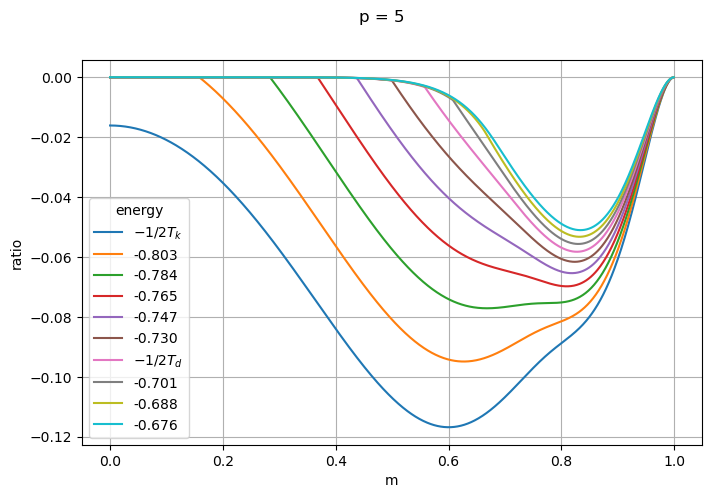

In [227]:
fig, ax = plt.subplots(figsize=(8, 5))
fig.suptitle(f"p = {p}")

for i, e in enumerate(es):
    legend_name = legend_name_Tk_Td(e, T_kauz, T_dyn)
    ax.plot(ms, ratios[i], label=legend_name)
ax.legend(title="energy")
ax.set_xlabel("m")
ax.set_ylabel("ratio")
ax.grid()
#ax.set_ylim(0., 1.02)
fig.savefig(f"./imgs/ratio_2nd_moment_p{p}.png", dpi=360)

In [235]:
es

array([-0.82379109, -0.80324511, -0.78369906, -0.76508167, -0.7473283 ,
       -0.73038016, -0.71418369, -0.70086206, -0.68802831, -0.67565611])

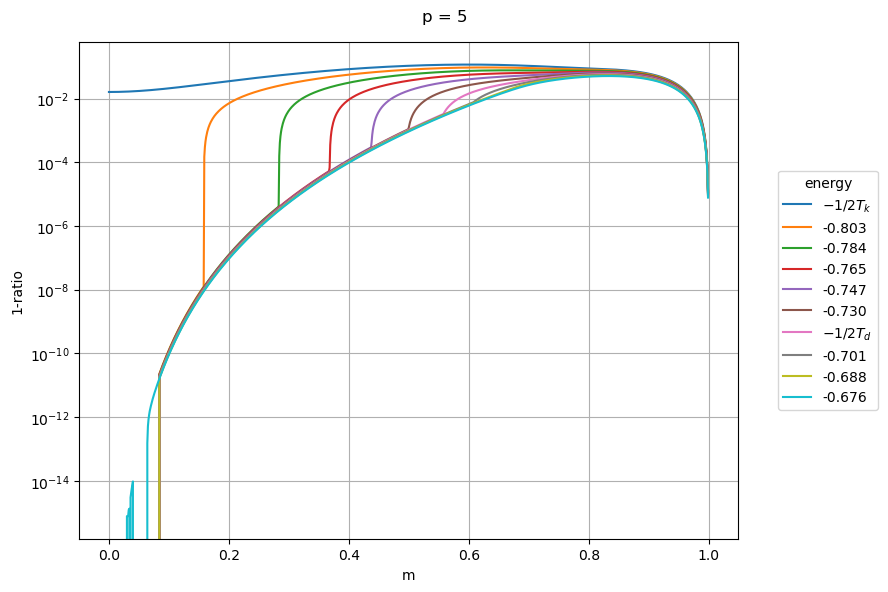

In [231]:
fig, ax = plt.subplots(figsize=(9, 6))
fig.suptitle(f"p = {p}")

for i, e in enumerate(es):
    legend_name = legend_name_Tk_Td(e, T_kauz, T_dyn)
    ax.plot(ms, - ratios[i], label=legend_name)
lgd = ax.legend(title="energy", loc='center left', bbox_to_anchor=(1.05, 0.5))
ax.set_xlabel("m")
ax.set_ylabel("1-ratio")
ax.grid()
ax.set_yscale("log")
#ax.set_ylim(0., 1.02)
plt.tight_layout()
#fig.savefig(f"./imgs/1mratio_2nd_moment_p{p}.png", bbox_extra_artists=(lgd,), bbox_inches='tight', dpi=360)